<a href="https://colab.research.google.com/github/IsidroJ/Colab_Archivos_Clase_PADP/blob/main/Pr%C3%A1ctica_22_Regresi%C3%B3n_Lineal_M%C3%BAltiple_IJGH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maestría en Inteligencia Artificial y Analítica de Datos

## Programación para Analítica Descriptiva y Predictiva - Marzo 2025
## Práctica: Práctica: Regresión Lineal Múltiple
---


## Datos del Estudiante

*   Apellidos y Nombre: Isidro Jesús González Hernández
*   Matrícula:261550

---



##  Objetivo de aprendizaje
Al finalizar esta práctica, el estudiante será capaz de **aplicar regresión lineal múltiple utilizando Scikit-Learn para modelar la relación entre varias variables independientes y una variable dependiente**, verificar los supuestos del modelo, interpretar los coeficientes, analizar la correlación entre predictores y evaluar el rendimiento del modelo utilizando métricas como el MSE, RMSE y R².

Datos
Trabajarás con el archivo `advertising.csv`, que contiene información sobre el gasto publicitario en diferentes medios y las ventas obtenidas:

-`TV`: inversión en publicidad televisiva.

-`Radio`: inversión en publicidad en radio.

-`Newspaper`: inversión en publicidad en periódicos.

`Sales`: ventas del producto (variable dependiente).

## **Parte 1: Carga de datos y bibliotecas**
1. Importa las bibliotecas necesarias.
2. Carga el archivo `advertising.csv`.
3. Muestra las primeras filas del dataframe.
4. Describe estadísticamente las variables.

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9





Descripción estadística del dataset:
               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None




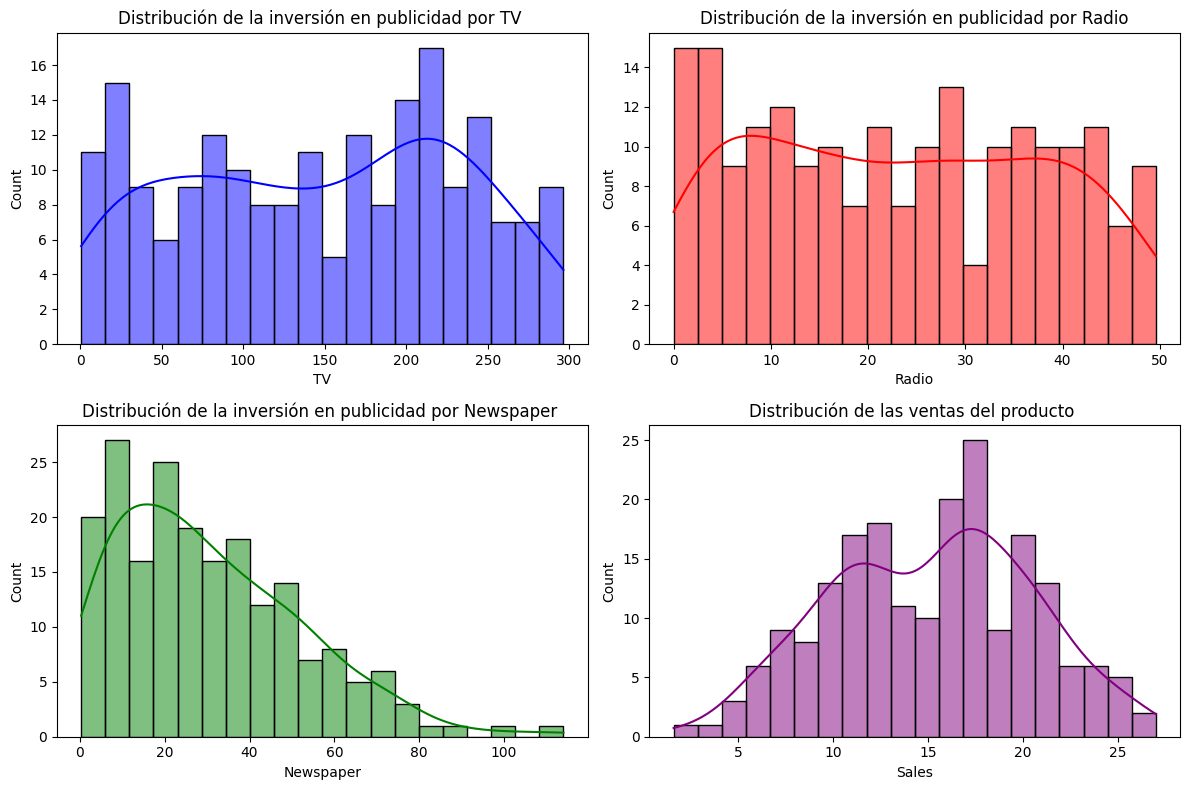

In [36]:
# 1. Importa las bibliotecas necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

# 2. Carga el archivo `restaurantes.csv`
df = pd.read_csv('/content/drive/MyDrive/1_ClassFiles/17_Clase 10-10-2025/Práctica 22 Regresión Lineal Múltiple/advertising.csv')

#3. Muestra las primeras filas del dataframe.
display(HTML("<h3 style='color:blue; font-size:18px;'> Información del dataframe </h3>"))
print(df.head())

print('\n')

# 4. Describe estadísticamente el conjunto de datos.
display(HTML("<h3 style='color:blue; font-size:18px;'> Descripción estadística del dataset </h3>"))

print("\nDescripción estadística del dataset:")
print(df.describe())

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Valores nulos y tipos de datos </h3>"))
print(df.info())

print('\n')
display(HTML("<h3 style='color:blue; font-size:18px;'> Distribución de las variables independientes y dependiente </h3>"))
fig, axes = plt.subplots(2, 2, figsize=(12, 8)) # Increased figsize for better visibility

# Histograma para la columna TV
sns.histplot(df['TV'], bins=20, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title("Distribución de la inversión en publicidad por TV ")

# Histograma para la columna Radio
sns.histplot(df['Radio'], bins=20, kde=True, ax=axes[0, 1], color="red")
axes[0, 1].set_title("Distribución de la inversión en publicidad por Radio")

# Histograma para la columna Newspaper
sns.histplot(df['Newspaper'], bins=20, kde=True, ax=axes[1, 0], color="green") # Changed color for clarity
axes[1, 0].set_title("Distribución de la inversión en publicidad por Newspaper ")

# Histograma para la columna Sales
sns.histplot(df['Sales'], bins=20, kde=True, ax=axes[1, 1], color="purple") # Changed color for clarity
axes[1, 1].set_title("Distribución de las ventas del producto ")

plt.tight_layout()
plt.show()

## **Parte 2: Análisis exploratorio de los datos**
### **2.1  Análisis de la Relación Lineal entre la variable dependiente y las independientes**
1. Grafica dispersión entre cada variable independiente (`TV`, `Radio`, `Newspaper`) y `Sales`. Usa también regplot.
2. Interpreta visualmente la relación entre variables.

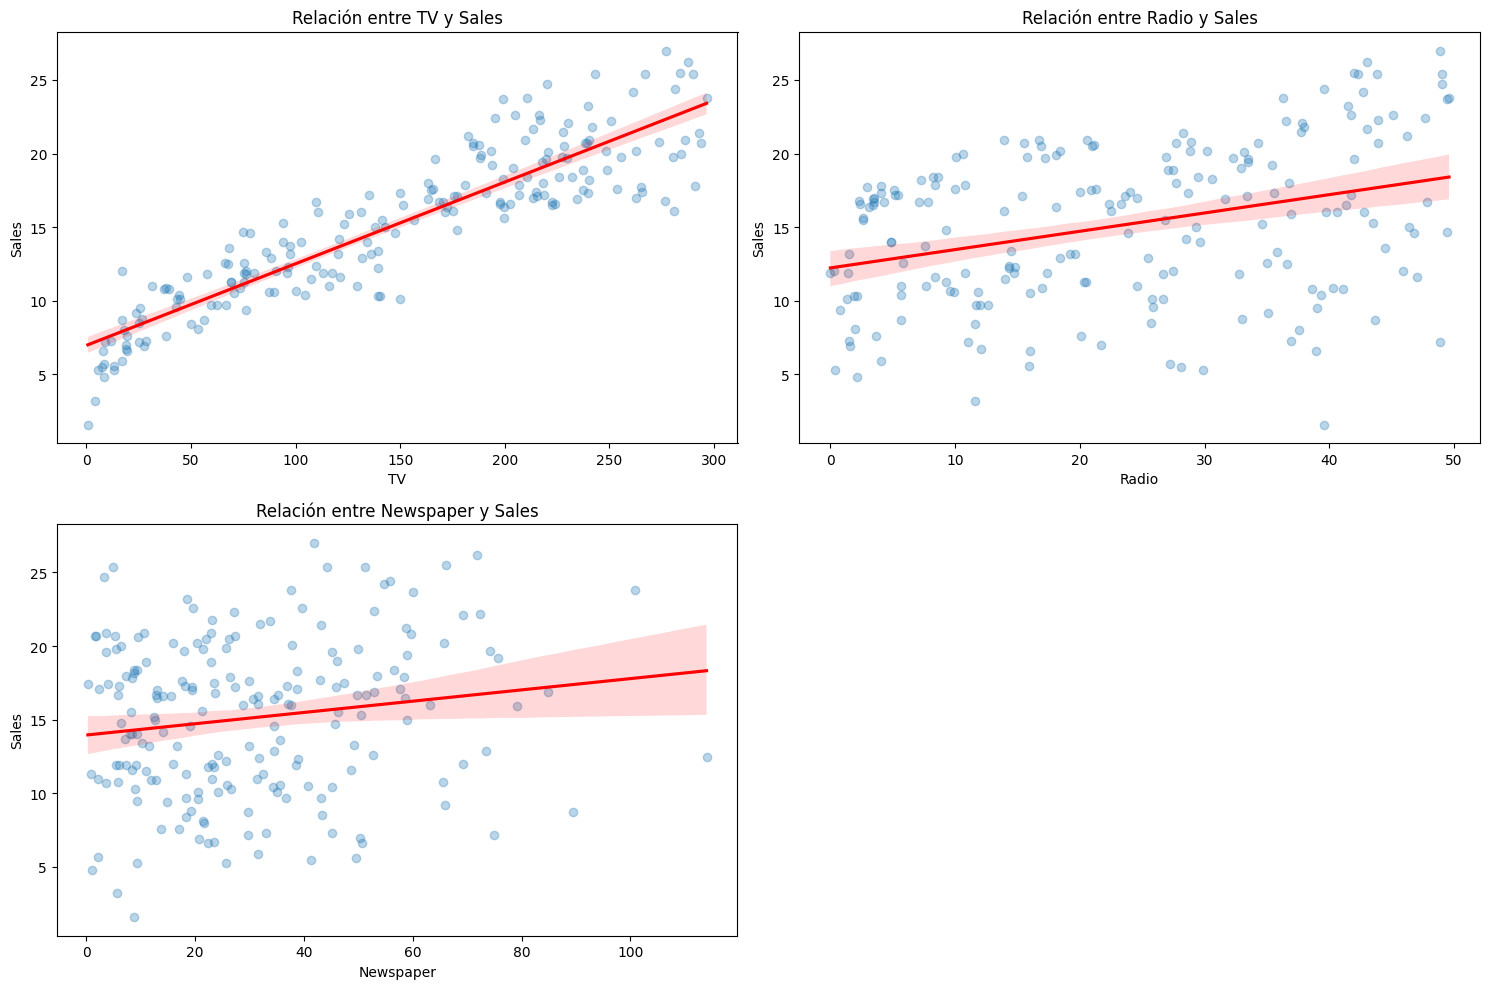

In [37]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Grafica dispersión entre cada variable independiente (TV, Radio, Newspaper) y Sales </h3>"))

X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (precio)

#print(X)
#print('\n')
#print(y)

plt.figure(figsize=(15, 10))
for i, col in enumerate(X.columns):
    plt.subplot(2, 2, i + 1)
    sns.regplot(x=X[col], y=y, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'}) # Se agrega regplot
    plt.title(f"Relación entre {col} y Sales")

plt.tight_layout()
plt.show()






**Interpreta visualmente la relación entre variables.**

La relación entre la variable independiente TV y la dependiente Sales, visualmente se muestra un relación lineal y positiva, ya que los puntos siguen una tendencia ascendente, es decir, conforme aumenta los gatos de publicidad en TV, también se infiere que incrementan las ventas del producto.

Para la relación entre la variable independiente Radio y la dependiente Sales, se percibe una relación lineal y positiva, menor que la variable TV, pero los puntos siguen una tendencia ascendente ligera, es decir, conforme aumentan los gatos de publicidad en Radio, también se infiere que incrementa de forma ligera las ventas del producto. Otro aspecto que se observa, es que los datos están muy dispersos con respecto a la recta de regresión.

Para la relación entre la variable independiente Newspaper y la dependiente Sales, se percibe una relación lineal y positiva, mucho menor que las otras dos. Es decir, los puntos siguen una tendencia ascendente pero muy ligera. Esto nos puede indicar que la variable Newspaper no es un factor fuerte que influye en la venta de los productos. Además, los puntos se observan muy dispersos con respecto a la recta.

Conclusión: la variable que más influye en la venta del producto esta asociado a la publicidad por TV.


### **2.2: Correlación entre variables**
1. Calcula la matriz de correlación.
2. Visualízala con un heatmap.
3. Responde: ¿Qué variables están más correlacionadas con `Sales`? ¿Hay correlación alta entre predictores?

In [38]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Matriz de correlación </h3>"))

corr = df.corr(numeric_only=True)
print(corr.round(3))

              TV  Radio  Newspaper  Sales
TV         1.000  0.055      0.057  0.901
Radio      0.055  1.000      0.354  0.350
Newspaper  0.057  0.354      1.000  0.158
Sales      0.901  0.350      0.158  1.000


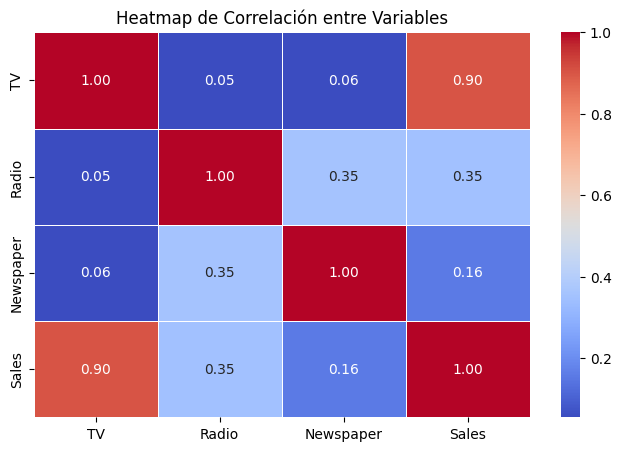

In [39]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Heatmap de correlación entre todas las variables </h3>"))

# 5. Heatmap de correlación entre todas las variables
plt.figure(figsize=(8, 5))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title("Heatmap de Correlación entre Variables")
plt.show()

**¿Qué variables están más correlacionadas con Sales?**

La variable que esta más correlacionada con el proceso de ventas del producto es la publicidad por TV. Es decir, la inversión en TV explica gran parte de la variabilidad de las ventas del producto (Sales) a un nivel lineal de r=0.90.

**¿Hay correlación alta entre predictores?**

Entre predictores no existe una correlación fuerte, el valor más alto que se observa es en la correlación entre Radio y Newspaper con un valor de r=0.35.


## **Parte 3. Multicolinealidad**
1. Calcula el VIF (Variance Inflation Factor) para cada predictor.
2. Crea un diagrama de barras  para mostrar el  VIF
3. Interpreta si hay multicolinealidad:
- ¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?
- ¿Qué implicaciones tiene esto para el modelo?

In [40]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Calcula el VIF (Variance Inflation Factor) para cada predictor </h3>"))

# 6. Multicolinealidad: Cálculo de VIF (Variance Inflation Factor)
# El VIF evalúa la colinealidad de cada variable con respecto a las demás. VIF > 5 o 10 indica posible multicolinealidad.
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import add_constant

# Agregar constante para calcular el VIF
X = add_constant(df.drop(columns=['Sales']))  # Matriz de características sin la variable dependiente
vif_data = pd.DataFrame()
vif_data['Variable'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\n### Análisis de Multicolinealidad ###")
print(vif_data)


### Análisis de Multicolinealidad ###
    Variable       VIF
0      const  6.848900
1         TV  1.004611
2      Radio  1.144952
3  Newspaper  1.145187


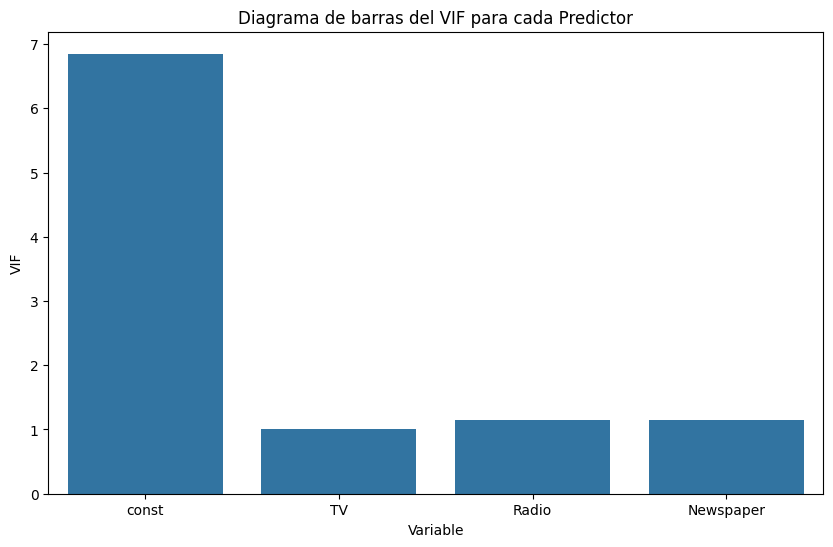

In [41]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Diagrama de barras para mostrar el VIF </h3>"))

plt.figure(figsize=(10, 6))
sns.barplot(x='Variable', y='VIF', data=vif_data)
plt.title("Diagrama de barras del VIF para cada Predictor")
plt.xlabel("Variable")
plt.ylabel("VIF")
plt.show()

**Interpreta si hay multicolinealidad:**

**¿Alguna variable tiene un VIF mayor a 5 o mayor a 10?**

Con base en los resultados del análisis de multicolinealidad, ninguno de lo spredictores presenta un VIF mayor a 5. El más alto es el de Newspaper con un valor de 1.145187.


**¿Qué implicaciones tiene esto para el modelo?**

Como ya se mencionó anteriormente los valores de VIF para las variables independientes son bajos, eso nos indica que no hay multicolinealidad significativa entre los predictores. Por lo tanto, se puede inferir que los coeficientes estimados para TV, Radio y Newspaper reflejarán una contribución única con respecto al variable a las ventas (Sales).

## **Parte 4: Construcción del Modelo (Todas las variables Independientes), Evaluación**

### **4.1 Entrenamiento del Modelo (Todas las Variables Independientes)**

1. Entrena un modelo de regresión lineal múltiple usando TV, Radio y Newspaper como variables independientes.
2. Imprime el intercepto y los coeficientes del modelo.
3. Interpreta cada uno:
¿Qué significa cada uno de los coeficientes  en términos de ventas?

In [42]:
X = df.drop(columns='Sales')  # Características
y = df['Sales']  # Variable dependiente (precio)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
model = LinearRegression()
model.fit(X_scaled,y)

LinearRegression()

In [43]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Coeficientes y el Término Independiente </h3>"))

coefficients = model.coef_
intercept = model.intercept_

print(f"\nCoeficientes estimados: {coefficients}")
print(f"Término independiente estimado: {intercept:.4f}")
#######################################################
print('\n')
equation = f"Sales = {intercept:.4f} "
for i, coef in enumerate(coefficients):
  equation += f"+ ({coef:.4f} * {X.columns[i]}) "

print(equation) #se obtiene el modelo con los coeficientes


Coeficientes estimados: [4.66270025 1.58465027 0.00729187]
Término independiente estimado: 15.1305


Sales = 15.1305 + (4.6627 * TV) + (1.5847 * Radio) + (0.0073 * Newspaper) 



**¿Qué significa cada uno de los coeficientes en términos de ventas?**

Término independiente (intercepto): 15.1305. El intercepto hace referencia a la variable ventas (Sales), cuando todas las variables independientes son igual a cero las vetas del producto serían 15.1305, es decir si no hay inversión en publicidad por cualquiera de los tres medios, las ventas serán de 15.1305.

El coeficiente de TV indica que, si dicha variable aumenta en una unidad, las ventas (Sales) del producto aumentarán en promedio en 4.6627 unidades, manteniendo las demás variables constantes. Es decir, entre más se invierta en publicidad por TV, mayor serán las ventas.

El coeficiente de Radio indica que, si dicha variable aumenta en una unidad, las ventas (Sales) del producto aumentarán en promedio en 1.5847 unidades, manteniendo las demás variables constantes. Como se puede observar esta variable no influye tan fuertemente como la variable TV, a pesar de que se invierta en publicidad en Radio no hay un incremento considerable en las ventas del producto.

Finalmente, el coeficiente de Newspaper también nos indica que si se invierte en este tipo de publicidad las ventas aumentaran. Sin embargo, con esta variable el incremento de las ventas no es considerable, por cada unidad que se invierta en Newspaper, las ventas incrementarán en 0.0073 unidades.


### **4.2 Normalidad de los residuos**

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

In [44]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Residuos (reales - predichos) </h3>"))

y_pred = model.predict(X_scaled)
residuos = y - y_pred
print(residuos)

0      0.879028
1     -0.868248
2      1.503791
3     -0.812447
4      2.255863
         ...   
195    0.494510
196    3.719059
197   -0.459287
198    0.917780
199    0.214880
Name: Sales, Length: 200, dtype: float64


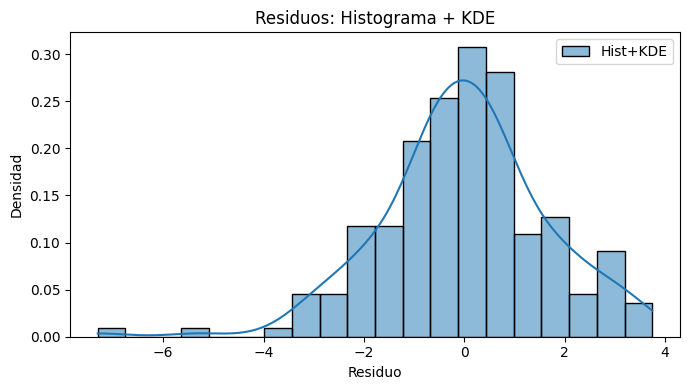

In [45]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Grafica un histograma con KDE de los residuos </h3>"))
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(7,4))
sns.histplot(residuos, bins=20, stat='density', kde=True, edgecolor='black', label='Hist+KDE')
plt.title("Residuos: Histograma + KDE")
plt.xlabel("Residuo"); plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()

**¿Los residuos parecen distribuirse normalmente?**

En el histograma se percibe que los residuos se distribuyen aproximadamente de forma normal, para confirmar dicha suposición se pueden hacer pruebas de normalidad y/o generar un gráfico Q-Q Plot. También, se observa en el histograma que la mayor parte de los residuos están alrededor de cero, es decir se puede percibir que el grafico es simétrico.

### **4.3. Homocedasticidad**

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

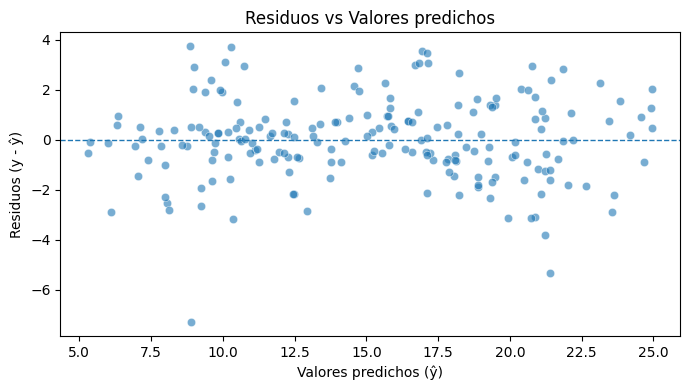



Breusch–Pagan p-value: 0.2638  ->  El valor de p es mayor a 0.05 por lo que se asume Homocedasticidad
White test p-value:    0.0182  ->  Heterocedasticidad
Durbin–Watson: 2.251 (≈2 independencia; <2 autocorrelación positiva)


In [46]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad </h3>"))

y_pred = model.predict(X_scaled)
residuos = y - y_pred  # residuos

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos")
plt.xlabel("Valores predichos (ŷ)")
plt.ylabel("Residuos (y - ŷ)")
plt.tight_layout()
plt.show()

print('\n')
from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

exog = sm.add_constant(X_scaled, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuos, exog)
white_stat, white_pvalue, _, _ = het_white(residuos, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05 por lo que se asume Homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es maoy a 0.05 por lo que se asume Homocedasticidad'}")

dw = durbin_watson(residuos)
print(f"Durbin–Watson: {dw:.3f} (≈2 independencia; <2 autocorrelación positiva)")


**¿Observas patrones?**

Al analizar la gráfica entre los residuos y los valores predichos, no se observan patrones definidos. Es decir, la nube de puntos no presenta una forma de curvatura o una forma de tendencia lineal clara; por el contrario, los residuos parecen distribuirse de manera irregular a lo largo del eje horizontal.

**¿Los residuos se dispersan aleatoriamente?**

Sí, los residuos se encuentran dispersos de forma aleatoria alrededor de la línea horizontal que se encuentra en cero, ademas no se percibe una concentración de puntos en una zona en particular. Esta distribución aleatoria indica que la varianza de los errores es aproximadamente constante en todo el rango de valores predichos, cumpliendo así con el supuesto de homocedasticidad.






### **4.4 Q-Q Plot**

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

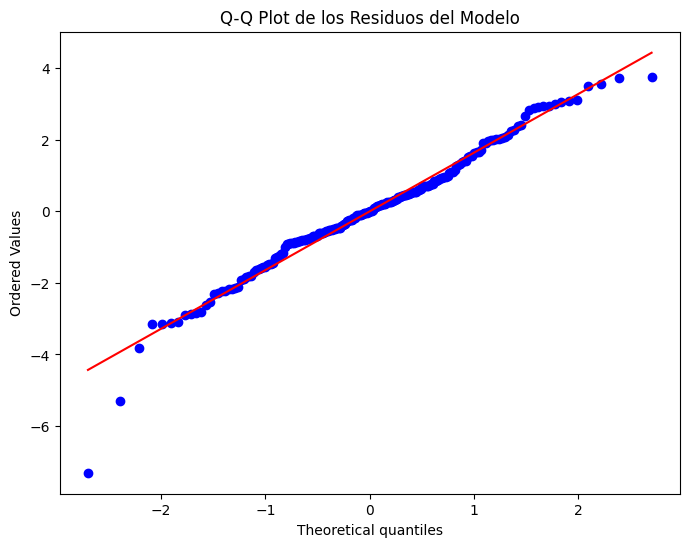

Media: -0.000, Desviación estándar: 1.649
Shapiro–Wilk: estadístico = 0.97581, p-valor = 0.00158
D’Agostino–Pearson: estadístico = 16.08135, p-valor = 0.00032
Kolmogorov–Smirnov: estadístico = 0.08231, p-valor = 0.12577


In [47]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad </h3>"))

y_pred = model.predict(X_scaled)
residuos = y - y_pred


plt.figure(figsize=(8, 6))
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo")
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos </h3>"))

# Pruebas de normalidad
print(f"Media: {residuos.mean():.3f}, Desviación estándar: {residuos.std():.3f}")

# Shapiro–Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Shapiro–Wilk: estadístico = {shapiro_test.statistic:.5f}, p-valor = {shapiro_test.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_test = stats.normaltest(residuos)
print(f"D’Agostino–Pearson: estadístico = {dagostino_test.statistic:.5f}, p-valor = {dagostino_test.pvalue:.5f}")

# Kolmogorov–Smirnov (con parámetros estimados)
z = (residuos - residuos.mean()) / residuos.std(ddof=1)
ks_test = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_test.statistic:.5f}, p-valor = {ks_test.pvalue:.5f}")

**Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.**


El gráfico Q-Q plot muestra que los puntos se alinean de forma razonable a la línea recta de referencia, la cual representa los cuantiles de la distribución teórica (distribución normal), pero se observan leves desviaciones en las colas. La prueba de normalidad de Kolmogorov-Smirnov nos muestra un valor mayor a 0.05 (p-valor = 0.08975) lo que se infiere que los residuos se ajustan a una distribución normal.



### **4.5. Evaluación del Modelo**

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

In [48]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Calcular las métricas del modelo MSE, RMSE y R² </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_pred = model.predict(X_scaled)
residuos = y - y_pred

# 13. Calcular las métricas del modelo
mse = mean_squared_error(y, y_pred)  # Error cuadrático medio
rmse = np.sqrt(mse)  # Raíz del error cuadrático medio
mae = mean_absolute_error(y, y_pred)  # Error absoluto medio
r2 = r2_score(y, y_pred)  # Coeficiente de determinación R^2

# 14. Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.4f}")
print(f"Error Absoluto Medio (MAE): {mae:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")

Error Cuadrático Medio (MSE): 2.7060
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Error Absoluto Medio (MAE): 1.2364
Coeficiente de Determinación (R²): 0.9026


**¿Qué nos dicen estas métricas sobre el ajuste del modelo?**

Para que un modelo de regresión lineal sea ideal, se busca que las métricas de los errores (valor real - valor predicho) sean valores cercanos a cero, en este caso el MSE y RMSE del modelo se acercan a cero. Además, el coeficiente de determinación es de 0.9026, lo que indica que el modelo de regresión lineal se ajusta muy bien al comportamiento d ellos datos.   

### **4.6. Visualización de Predicciones**

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

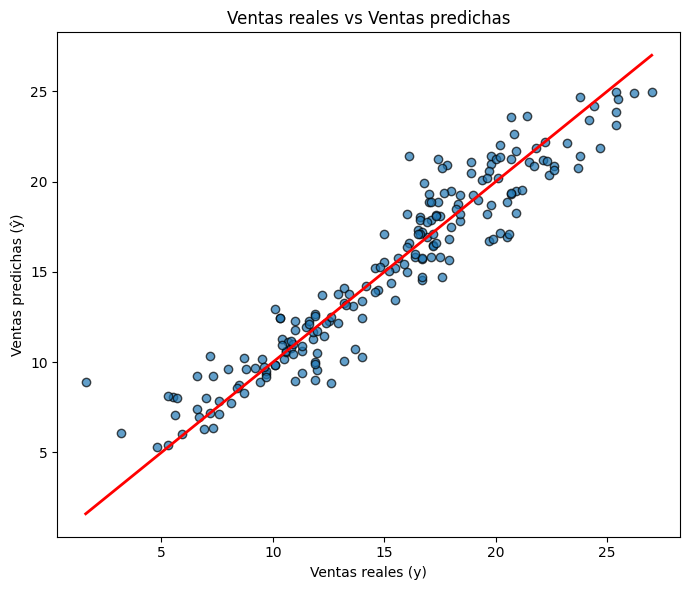

In [49]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de Predicciones: Sales reales vs. predichas </h3>"))

# Predicciones con el mismo escalado
y_pred = model.predict(X_scaled)

# 1. Dispersión entre valores reales y predichos
plt.figure(figsize=(7, 6))
plt.scatter(y, y_pred, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2, label='Línea ideal: y = ŷ')
plt.title("Ventas reales vs Ventas predichas")
plt.xlabel("Ventas reales (y)")
plt.ylabel("Ventas predichas (ŷ)")
plt.tight_layout()
plt.show()



**¿Qué observas? ¿Qué información puedes obtener de esta gráfica?**

La gráfica de dispersión entre las ventas reales y las ventas predichas muestra que la mayoría de los puntos (ventas reales) se concentran alrededor de la línea diagonal (ventas predichas), lo que indica que el modelo de regresión lineal logra un ajuste adecuado: las predicciones son cercanas a los valores reales. Esta suposición se justifica con el valor del coeficiente de determinación que es de 0.9026.

### **4.7 Verificar el impacto de los atributos en el modelo**

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?

In [50]:
import statsmodels.api as sm

Xcons_scaled = sm.add_constant(X_scaled)  # agrega intercepto
ols = sm.OLS(y, Xcons_scaled).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Thu, 16 Oct 2025   Prob (F-statistic):           8.13e-99
Time:                        18:30:15   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    128.771      0.0

**Observa los valores P>|t| en la tabla de salida.**

* ¿Qué variables tienen p-value menores a 0.05?

Las variables que presentan un p-value menor a 0.05 son: TV y Radio.

* ¿Cuál es la conclusión sobre esas variables?

Que ambas variables tienen un efecto significativo sobre las ventas del producto, es decir, si se incrementa la inversión en publicidad en ambos medios las ventas del producto también incrementaran significativamente.

##**Parte 5:  Construcción del Modelo (sin Multicolinealidad), Evaluación**

En el caso de que hayas detectado variables con multicolinealidad. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

**Con base en los resultados obtenidos no se presenta Multicolinealidad**

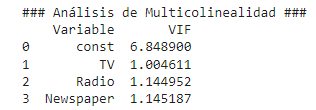

## **Parte 6: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación**

En el caso de que hayas detectado variables sin una relación lineal con la variable dependiente. Elimina aquellas que presenten esta característica y realiza lo siguiente.

En el caso de que hayas detectado variables sin una relación lineal. Elimina aquellas que presenten esta característica y realiza los mismos pasos** que la parte 4.**
Escribe cada una de las subsecciones similares a las existentes en la Parte 4.

## **Parte 4: Construcción del Modelo (sin variables que no muestran una relación lineal), Evaluación**

### **4.1 Entrenamiento del Modelo con las variables TV y Radio**


In [51]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Coeficientes y el Término Independiente del nuevo modelo </h3>"))

X_nueva = df[['TV','Radio']]
y  = df['Sales']

# Escalar predictores para comparar magnitudes de coeficientes
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

scalerNV = StandardScaler()
X_nueva_scaled = scalerNV.fit_transform(X_nueva)

modelNV = LinearRegression()
modelNV.fit(X_nueva_scaled, y)

coefficientsNV = modelNV.coef_
interceptNV = modelNV.intercept_

print(f"\nCoeficientes estimados: {coefficientsNV}")
print(f"Término independiente estimado: {interceptNV:.4f}")
#######################################################
print('\n')
equation = f"Sales = {interceptNV:.4f} "
for i, coef in enumerate(coefficientsNV):
  equation += f"+ ({coef:.4f} * {X.columns[i]}) "

print(equation) #se obtiene el modelo con los coeficientes



Coeficientes estimados: [4.66297261 1.58721742]
Término independiente estimado: 15.1305


Sales = 15.1305 + (4.6630 * TV) + (1.5872 * Radio) 


**¿Qué significa cada uno de los coeficientes en términos de ventas?**

Término independiente (intercepto): 15.1305. El intercepto hace referencia a la variable ventas (Sales), cuando todas las variables independientes son igual a cero las vetas del producto serían 15.1305, es decir si no hay inversión en publicidad por cualquiera de los dos medios, las ventas serán de 15.1305.

El coeficiente de TV indica que, si dicha variable aumenta en una unidad, las ventas (Sales) del producto aumentarán en promedio en 4.6630 unidades, manteniendo las demás variables constantes. Es decir, entre más se invierta en publicidad por TV, mayor serán las ventas.

El coeficiente de Radio indica que, si dicha variable aumenta en una unidad, las ventas (Sales) del producto aumentarán en promedio en 1.5872 unidades, manteniendo las demás variables constantes. Como se puede observar esta variable no influye tan fuertemente como la variable TV, a pesar de que se invierta en publicidad en Radio no hay un incremento considerable en las ventas del producto.

Concusión de primera instancia, no hubo modificación significativa con el modelo completo. Es decir, con o sin la variable Newspaper el modelo de regresión sigue el  mismo comportamiento.

### **4.2 Normalidad de los residuos del nuevo modelo**

1. Calcula los residuos: residuos = y - y_pred.

2. Grafica un histograma con KDE de los residuos.

3. ¿Los residuos parecen distribuirse normalmente?

In [52]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Residuos (reales - predichos) del nuevo modelo </h3>"))

y_predNV = modelNV.predict(X_nueva_scaled)
residuosNV = y - y_predNV
print(residuosNV)

0      0.889216
1     -0.865819
2      1.513286
3     -0.806207
4      2.267263
         ...   
195    0.492624
196    3.714873
197   -0.465069
198    0.926063
199    0.209815
Name: Sales, Length: 200, dtype: float64


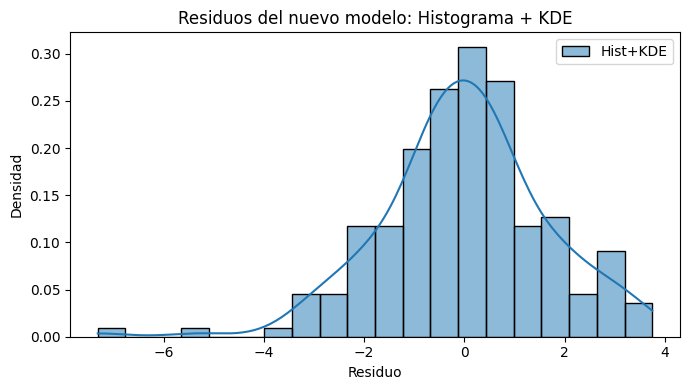

In [53]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Grafica un histograma con KDE de los residuos del modelo nuevo </h3>"))
import statsmodels.api as sm
import scipy.stats as stats

plt.figure(figsize=(7,4))
sns.histplot(residuosNV, bins=20, stat='density', kde=True, edgecolor='black', label='Hist+KDE')
plt.title("Residuos del nuevo modelo: Histograma + KDE")
plt.xlabel("Residuo"); plt.ylabel("Densidad")
plt.legend()
plt.tight_layout()
plt.show()


**¿Los residuos parecen distribuirse normalmente?**

Al igual que, el histograma del modelo completo, se ercibe que los residuos se distribuyen aproximadamente de forma normal, para confirmar dicha suposición se pueden hacer pruebas de normalidad y/o generar un gráfico Q-Q Plot. También, se observa en el histograma que la mayor parte de los residuos están alrededor de cero, es decir se puede percibir que el grafico es simétrico.

### **4.3. Homocedasticidad del nuevo modelo**

1. Grafica los residuos contra los valores predichos.
2. ¿Observas patrones? ¿Los residuos se dispersan aleatoriamente?

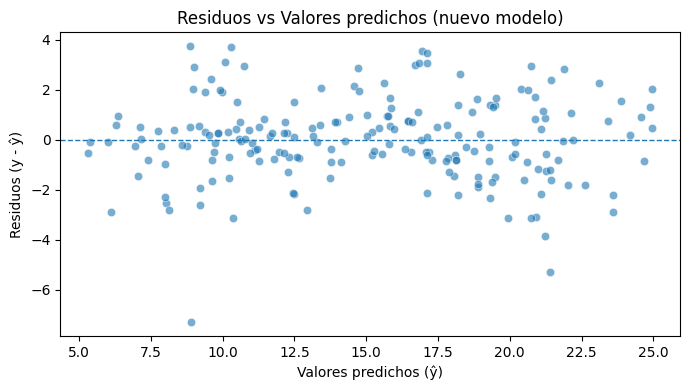



Breusch–Pagan p-value: 0.8881  ->  El valor de p es mayor a 0.05 por lo que se asume Homocedasticidad
White test p-value:    0.01957  ->  Heterocedasticidad
Durbin–Watson: 2.252 (≈2 independencia; <2 autocorrelación positiva)


In [54]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Homocedasticidad del nuevo modelo </h3>"))

y_predNV = modelNV.predict(X_nueva_scaled)
residuosNV = y - y_predNV

plt.figure(figsize=(7,4))
sns.scatterplot(x=y_predNV, y=residuosNV, alpha=0.6)
plt.axhline(0, linestyle='--', linewidth=1)
plt.title("Residuos vs Valores predichos (nuevo modelo)")
plt.xlabel("Valores predichos (ŷ)")
plt.ylabel("Residuos (y - ŷ)")
plt.tight_layout()
plt.show()

print('\n')
from statsmodels.stats.api import het_breuschpagan, het_white, durbin_watson
import statsmodels.api as sm

exog = sm.add_constant(X_nueva_scaled, has_constant="add")

bp_stat, bp_pvalue, _, _ = het_breuschpagan(residuosNV, exog)
white_stat, white_pvalue, _, _ = het_white(residuosNV, exog)

print(f"Breusch–Pagan p-value: {bp_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if bp_pvalue < 0.05 else 'El valor de p es mayor a 0.05 por lo que se asume Homocedasticidad'}")
print(f"White test p-value:    {white_pvalue:.4g}  ->  "
      f"{'Heterocedasticidad' if white_pvalue < 0.05 else 'El valor de p es maoy a 0.05 por lo que se asume Homocedasticidad'}")

dw = durbin_watson(residuosNV)
print(f"Durbin–Watson: {dw:.3f} (≈2 independencia; <2 autocorrelación positiva)")

**¿Observas patrones?**

Al analizar la gráfica entre los residuos y los valores predichos del nuevo modelo, no se observan patrones definidos al igual que el modelo completo. Es decir, la nube de puntos no presenta una forma de curvatura o una forma de tendencia lineal clara; por el contrario, los residuos parecen distribuirse de manera irregular a lo largo del eje horizontal.

**¿Los residuos se dispersan aleatoriamente?**

Sí, los residuos se encuentran dispersos de forma aleatoria alrededor de la línea horizontal que se encuentra en cero, este patron es el mismo que el modelo completo,  además no se percibe una concentración de puntos en una zona en particular. Esta distribución aleatoria indica que la varianza de los errores es aproximadamente constante en todo el rango de valores predichos, cumpliendo así con el supuesto de homocedasticidad.

### **4.4 Q-Q Plot del nuevo modelo**

1. Graficar el Q-Q Plot
2. Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.

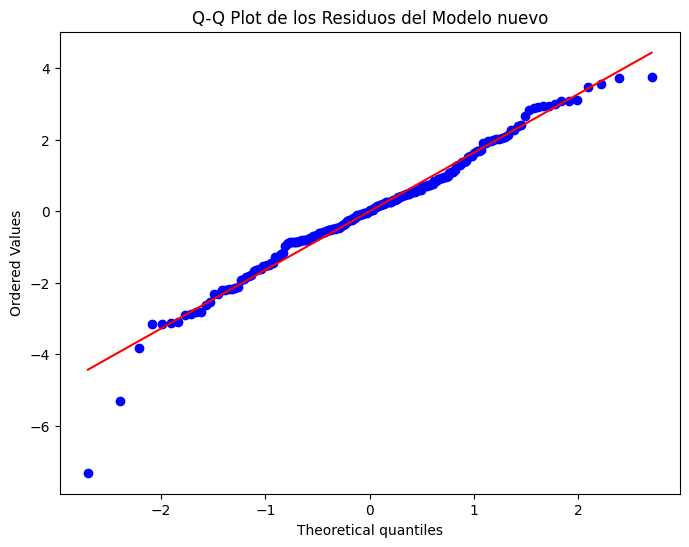

Media: -0.000, Desviación estándar: 1.649
Shapiro–Wilk: estadístico = 0.97574, p-valor = 0.00154
D’Agostino–Pearson: estadístico = 16.22688, p-valor = 0.00030
Kolmogorov–Smirnov: estadístico = 0.08167, p-valor = 0.13127


In [55]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Q-Q Plot para evaluar la normalidad del nuevo modelo </h3>"))

y_predNV = modelNV.predict(X_nueva_scaled)
residuosNV = y - y_predNV

plt.figure(figsize=(8, 6))
stats.probplot(residuosNV, dist="norm", plot=plt)
plt.title("Q-Q Plot de los Residuos del Modelo nuevo")
plt.show()

print('\n')

display(HTML("<h3 style='color:blue; font-size:18px;'> Pruebas de normalidad para los residuos del nuevo modelo </h3>"))

# Pruebas de normalidad
print(f"Media: {residuosNV.mean():.3f}, Desviación estándar: {residuosNV.std():.3f}")

# Shapiro–Wilk
shapiro_testNV = stats.shapiro(residuosNV)
print(f"Shapiro–Wilk: estadístico = {shapiro_testNV.statistic:.5f}, p-valor = {shapiro_testNV.pvalue:.5f}")

# D’Agostino–Pearson
dagostino_testNV = stats.normaltest(residuosNV)
print(f"D’Agostino–Pearson: estadístico = {dagostino_testNV.statistic:.5f}, p-valor = {dagostino_testNV.pvalue:.5f}")

# Kolmogorov–Smirnov (con parámetros estimados)
z = (residuosNV - residuosNV.mean()) / residuosNV.std(ddof=1)
ks_testNV = stats.kstest(z, 'norm')
print(f"Kolmogorov–Smirnov: estadístico = {ks_testNV.statistic:.5f}, p-valor = {ks_testNV.pvalue:.5f}")

**Interpreta el gráfico: a) Si los puntos se alinean aproximadamente sobre la línea diagonal, los residuos siguen una distribución normal, b) Desviaciones sistemáticas indican asimetría o colas pesadas.**


Al igual que el gráfico Q-Q del modelo completo, este gráfico también se tercibe que los puntos se alinean de forma razonable a la línea recta de referencia, la cual representa los cuantiles de la distribución teórica (distribución normal), pero se observan leves desviaciones en las colas. La prueba de normalidad de Kolmogorov-Smirnov nos muestra un valor mayor a 0.05 (p-valor = 0.13157) lo que se infiere que los residuos se ajustan a una distribución normal. Cabe recalcar que este último estadístico incremento a diferencia del modelo completo.

### **4.5. Evaluación del Modelo nuevo**

1. Calcula las métricas: a) MSE (error cuadrático medio), b) RMSE (raíz del error cuadrático medio), c) R² (coeficiente de determinación)

2. ¿Qué nos dicen estas métricas sobre el ajuste del modelo?

In [56]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Calcular las métricas del modelo MSE, RMSE y R² del nuevo modelo </h3>"))

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

y_predNV = modelNV.predict(X_nueva_scaled)
residuosNV = y - y_predNV

# 13. Calcular las métricas del modelo
mseNV = mean_squared_error(y, y_predNV)  # Error cuadrático medio
rmseNV = np.sqrt(mseNV)  # Raíz del error cuadrático medio
maeNV = mean_absolute_error(y, y_predNV)  # Error absoluto medio
r2NV = r2_score(y, y_predNV)  # Coeficiente de determinación R^2

# 14. Mostrar las métricas
print(f"Error Cuadrático Medio (MSE): {mseNV:.4f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmseNV:.4f}")
print(f"Error Absoluto Medio (MAE): {maeNV:.4f}")
print(f"Coeficiente de Determinación (R²): {r2NV:.4f}")

Error Cuadrático Medio (MSE): 2.7061
Raíz del Error Cuadrático Medio (RMSE): 1.6450
Error Absoluto Medio (MAE): 1.2368
Coeficiente de Determinación (R²): 0.9026


**¿Qué nos dicen estas métricas sobre el ajuste del modelo?**

Para que un modelo de regresión lineal sea ideal, se busca que las métricas de los errores (valor real - valor predicho nuevo) sean valores cercanos a cero, en este caso el MSE y RMSE del modelo se acercan a cero. Además, el coeficiente de determinación es de 0.9026, lo que indica que el modelo de regresión lineal se ajusta muy bien al comportamiento d ellos datos. Prácticamente son los mismos valores que presenta el modelo completo.      

### **4.6. Visualización de Predicciones del nuevo modelo**

1. Crea un gráfico comparando Sales reales vs Sales predichas.

2. Puedes usar plt.scatter(y_true, y_pred) para evaluar visualmente el ajuste.
3.¿Qué observas?¿Qué observas? ¿Qué información puedes obtener de esta gráfica?

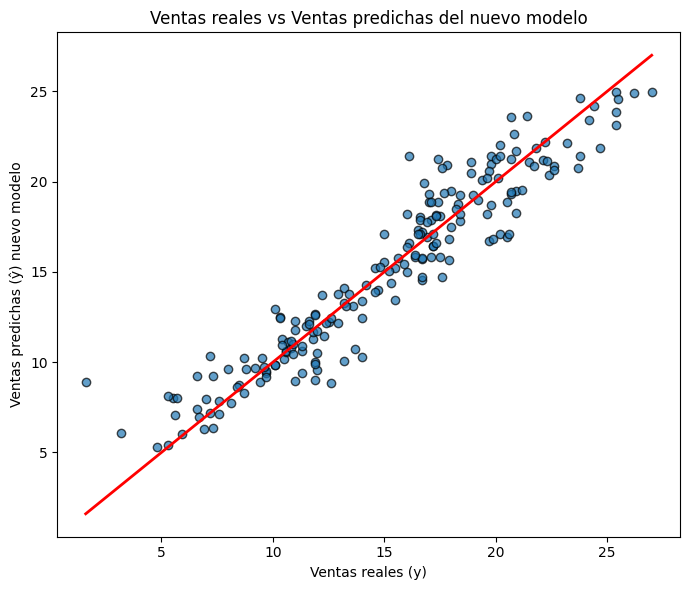

In [57]:
display(HTML("<h3 style='color:blue; font-size:18px;'> Visualización de Predicciones: Sales reales vs. predichas del nuevo modelo </h3>"))

# Predicciones con el mismo escalado
y_predNV = modelNV.predict(X_nueva_scaled)

# 1. Dispersión entre valores reales y predichos
plt.figure(figsize=(7, 6))
plt.scatter(y, y_predNV, alpha=0.7, edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='-', linewidth=2, label='Línea ideal: y = ŷ')
plt.title("Ventas reales vs Ventas predichas del nuevo modelo")
plt.xlabel("Ventas reales (y)")
plt.ylabel("Ventas predichas (ŷ) nuevo modelo")
plt.tight_layout()
plt.show()

**¿Qué observas? ¿Qué información puedes obtener de esta gráfica?**

La gráfica de dispersión entre las ventas reales y las ventas predichas del nuevo modelo muestra que la mayoría de los puntos (ventas reales) se concentran alrededor de la línea diagonal (ventas predichas), lo que indica que el modelo de regresión lineal logra un ajuste adecuado: las predicciones son cercanas a los valores reales. Esta suposición se justifica con el valor del coeficiente de determinación que es de 0.9026. Esta gráfica no cambia en compoaración con el modelo completo.

### **4.7 Verificar el impacto de los atributos en el modelo**

1. Ajusta el modelo usando statsmodels en lugar de scikit-learn para obtener los valores p.
2. Interpreta los resultados:

 - Observa los valores P>|t| en la tabla de salida.

 - ¿Qué variables tienen p-value menores a 0.05?

 - ¿Cuál es la conclusión sobre esas variables?

In [58]:
import statsmodels.api as sm

X_nueva_scaled = scalerNV.fit_transform(X_nueva)

Xcons_scaledNV = sm.add_constant(X_nueva_scaled)  # agrega intercepto
olsNV = sm.OLS(y, Xcons_scaledNV).fit()
print(olsNV.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     912.7
Date:                Thu, 16 Oct 2025   Prob (F-statistic):          2.39e-100
Time:                        18:30:16   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             772.7
Df Residuals:                     197   BIC:                             782.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1305      0.117    129.098      0.0

**Observa los valores P>|t| en la tabla de salida.**

* ¿Qué variables tienen p-value menores a 0.05?

Las dos variables (TV y Radio) presentan un p-value menor a 0.05.

* ¿Cuál es la conclusión sobre esas variables?

Que ambas variables tienen un efecto significativo sobre las ventas del producto, es decir, si se incrementa la inversión en publicidad en ambos medios las ventas del producto también incrementaran significativamente. Es el mismo comportamiento que en el modelo completo.

##**7. Conclusiones.**

**¿Cuál de los tres modelos construidos fue el mejor?**

Para el dataset que se analizó, sólo se desarrollaron dos modelos, uno completo y el otro donde se eliminó la variable que no generaba influencia significativa en los valores predichos del modelo completo, es decir en el segundo modelo sólo se consiedaron las variables de TV y Radio. El tercer modelo no se genero porque los resultados obtenidos en el modelo completo no se presento Multicolinealidad. Con base en los resultados d elos dos modelos, no hay un modelo que supere al otro, es decir ambos entregan los mismos resultados.


**¿Cuál fue el atributo que mas influencia tiene en las ventas?**

La variable o atributo que más influye en las ventas del producto es la publicidad echa en TV.